In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv')


df[0:100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
95,None,280.00,0.0,0.0,75,Clouds,broken clouds,2012-10-06 15:00:00,5153
96,None,279.06,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 16:00:00,5024
97,None,278.91,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 17:00:00,4779
98,None,278.39,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 18:00:00,4362


In [ ]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

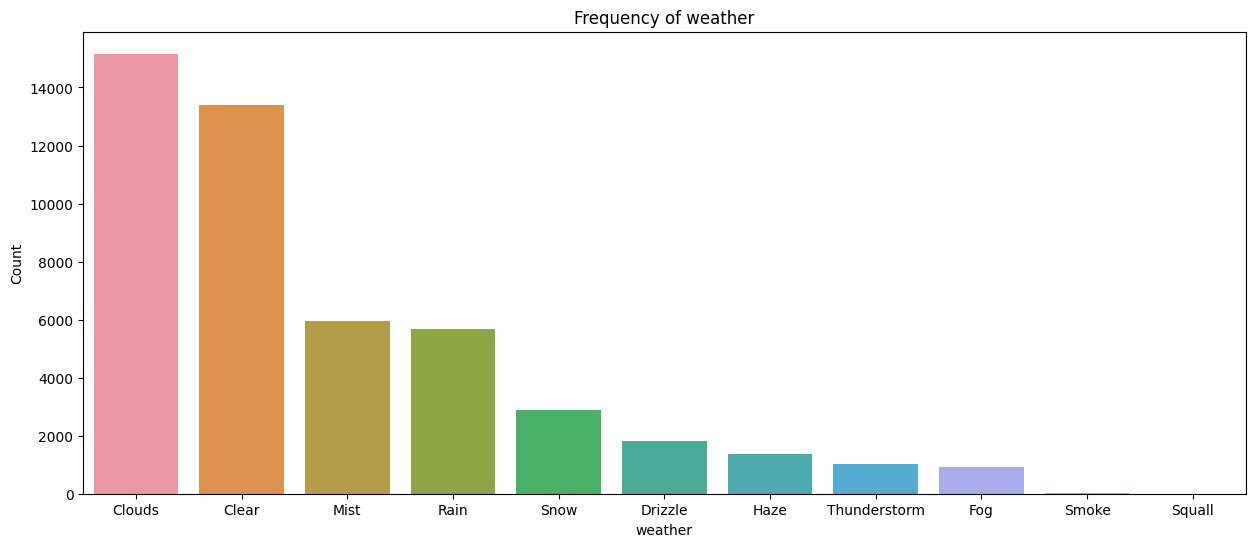

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['weather_main'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('weather')
plt.ylabel('Count')
plt.title('Frequency of weather')
plt.show()
print(holiday_counts)

In [ ]:
# kelvin을 celcius로 변환
df['temp']=df['temp']-273.15

In [ ]:
# holiday를 1 non holiday는 0으로 변환
specific_holidays = ['Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', 'New Years Day', 'Washingtons Birthday', 'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day', 'Martin Luther King Jr Day']
df['holiday'] = df['holiday'].apply(lambda x: 1 if x in specific_holidays else 0)

df[0:100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
95,0,6.85,0.0,0.0,75,Clouds,broken clouds,2012-10-06 15:00:00,5153
96,0,5.91,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 16:00:00,5024
97,0,5.76,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 17:00:00,4779
98,0,5.24,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 18:00:00,4362


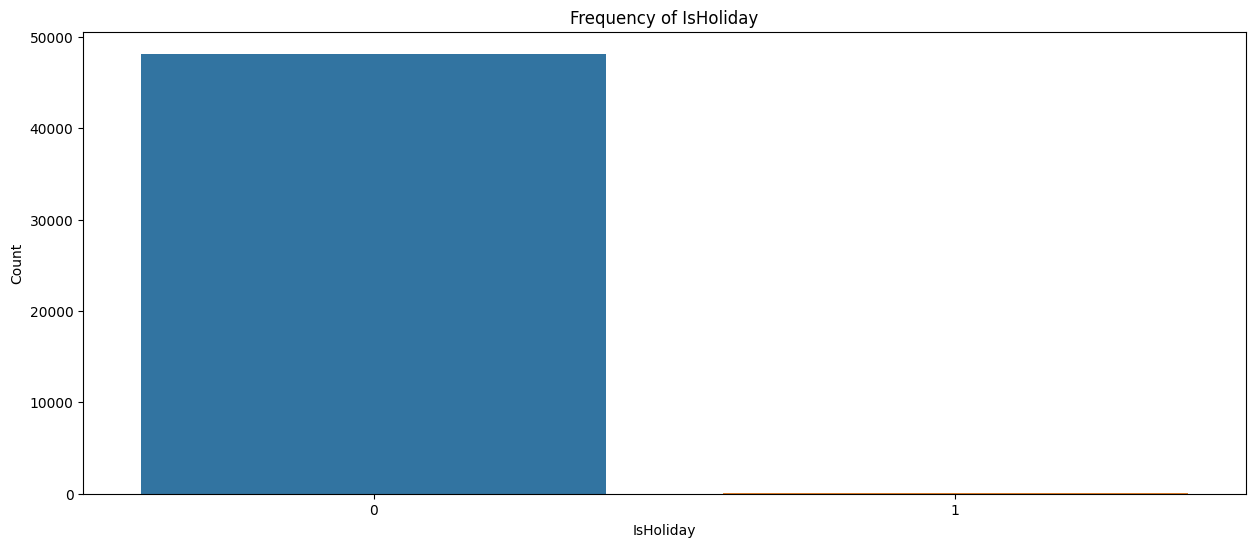

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['holiday'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Frequency of IsHoliday')
plt.show()

In [ ]:
print(holiday_counts)

0    48143
1       61
Name: holiday, dtype: int64


#데이터 전처리


In [ ]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [ ]:
df.isna().sum() # 결측치 없으므로 결측치 제거는 넘어감

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [ ]:
# weather_main 칼럼 label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['weather_main'] = encoder.fit_transform(df['weather_main'])

In [ ]:
# rain 이상치 제거
df = df[df['rain_1h'] <= 2000]
print(df['rain_1h'].max())

55.63


In [ ]:
import pandas as pd

# 필요한 열만 선택
selected_columns =[ 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'date_time', 'traffic_volume']
traffic_df = df[selected_columns]

In [ ]:
traffic_df[traffic_df.duplicated(['date_time'], keep = False)] # 중복된 time data 확인

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
178,0,8.10,0.0,0.0,99,6,2012-10-10 07:00:00,6793
179,0,8.10,0.0,0.0,99,2,2012-10-10 07:00:00,6793
180,0,6.95,0.0,0.0,99,6,2012-10-10 08:00:00,6283
181,0,6.95,0.0,0.0,99,2,2012-10-10 08:00:00,6283
182,0,6.46,0.0,0.0,99,6,2012-10-10 09:00:00,5680
...,...,...,...,...,...,...,...,...
48173,0,7.53,0.0,0.0,90,1,2018-09-29 19:00:00,3818
48192,0,10.33,0.0,0.0,90,6,2018-09-30 14:00:00,4380
48193,0,10.33,0.0,0.0,90,2,2018-09-30 14:00:00,4380
48194,0,10.69,0.0,0.0,75,6,2018-09-30 15:00:00,4302


In [ ]:
# 중복된 행 제거
traffic_df.drop_duplicates(inplace=True)
traffic_df.drop_duplicates(['date_time'], inplace=True)

# 결과 확인
print(len(df)) # raw data: 48,203개
print(len(traffic_df)) # 중복 삭제 후: 40,574개

48203
40574


<ipython-input-17-ab1ba04f1e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df.drop_duplicates(inplace=True)
<ipython-input-17-ab1ba04f1e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df.drop_duplicates(['date_time'], inplace=True)


In [ ]:
# 누락된 시간 데이터 확인
expected_dates = pd.date_range(start=traffic_df['date_time'].min(), end=traffic_df['date_time'].max(), freq='H')
missing_dates = expected_dates.difference(traffic_df['date_time'])

print("누락된 날짜:")
print(missing_dates)
len(missing_dates) # 누락데이터 개수: 11,977개

누락된 날짜:
DatetimeIndex(['2012-10-03 07:00:00', '2012-10-03 10:00:00',
               '2012-10-03 11:00:00', '2012-10-03 17:00:00',
               '2012-10-05 02:00:00', '2012-10-05 04:00:00',
               '2012-10-06 03:00:00', '2012-10-07 01:00:00',
               '2012-10-07 02:00:00', '2012-10-09 03:00:00',
               ...
               '2018-03-24 05:00:00', '2018-03-24 06:00:00',
               '2018-03-24 07:00:00', '2018-03-29 02:00:00',
               '2018-05-05 02:00:00', '2018-06-02 02:00:00',
               '2018-08-07 07:00:00', '2018-08-07 08:00:00',
               '2018-08-07 09:00:00', '2018-08-23 02:00:00'],
              dtype='datetime64[ns]', length=11977, freq=None)


11977

In [ ]:
# 누락 데이터 보간 linear interpolate(선형 보간)
traffic_df = traffic_df.set_index('date_time').reindex(expected_dates)
traffic_df = traffic_df.interpolate(method='linear')
traffic_df = traffic_df.reset_index().rename(columns={'index': 'date_time'})

print(traffic_df.isna().sum())
print(traffic_df.info()) # 최종 데이터 개수: 52,551개

date_time         0
holiday           0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
weather_main      0
traffic_volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52551 entries, 0 to 52550
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       52551 non-null  datetime64[ns]
 1   holiday         52551 non-null  float64       
 2   temp            52551 non-null  float64       
 3   rain_1h         52551 non-null  float64       
 4   snow_1h         52551 non-null  float64       
 5   clouds_all      52551 non-null  float64       
 6   weather_main    52551 non-null  float64       
 7   traffic_volume  52551 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.2 MB
None


In [ ]:
# preprocessed 파일 저장
traffic_df.to_csv('/traffic_volume_preprocessed_2.csv', index=False)
# traffic_df.to_csv('/content/drive/MyDrive/traffic_volume_preprocessed_2.csv', index=False)

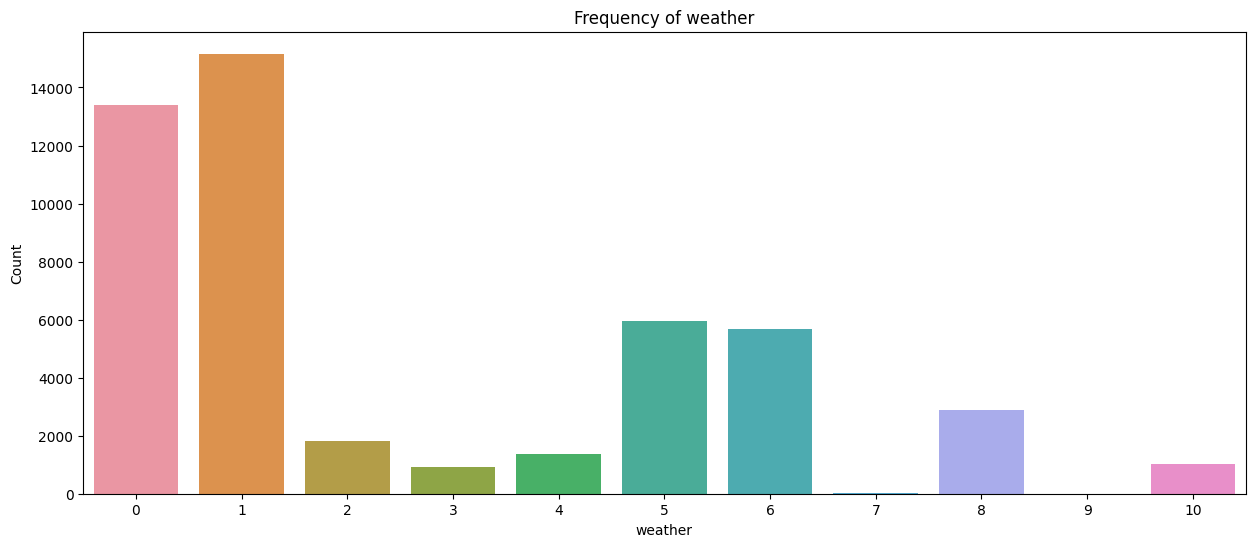

1     15164
0     13391
5      5950
6      5671
8      2876
2      1821
4      1360
10     1034
3       912
7        20
9         4
Name: weather_main, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['weather_main'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('weather')
plt.ylabel('Count')
plt.title('Frequency of weather')
plt.show()
print(holiday_counts)

#교통량 분포 그래프 확인


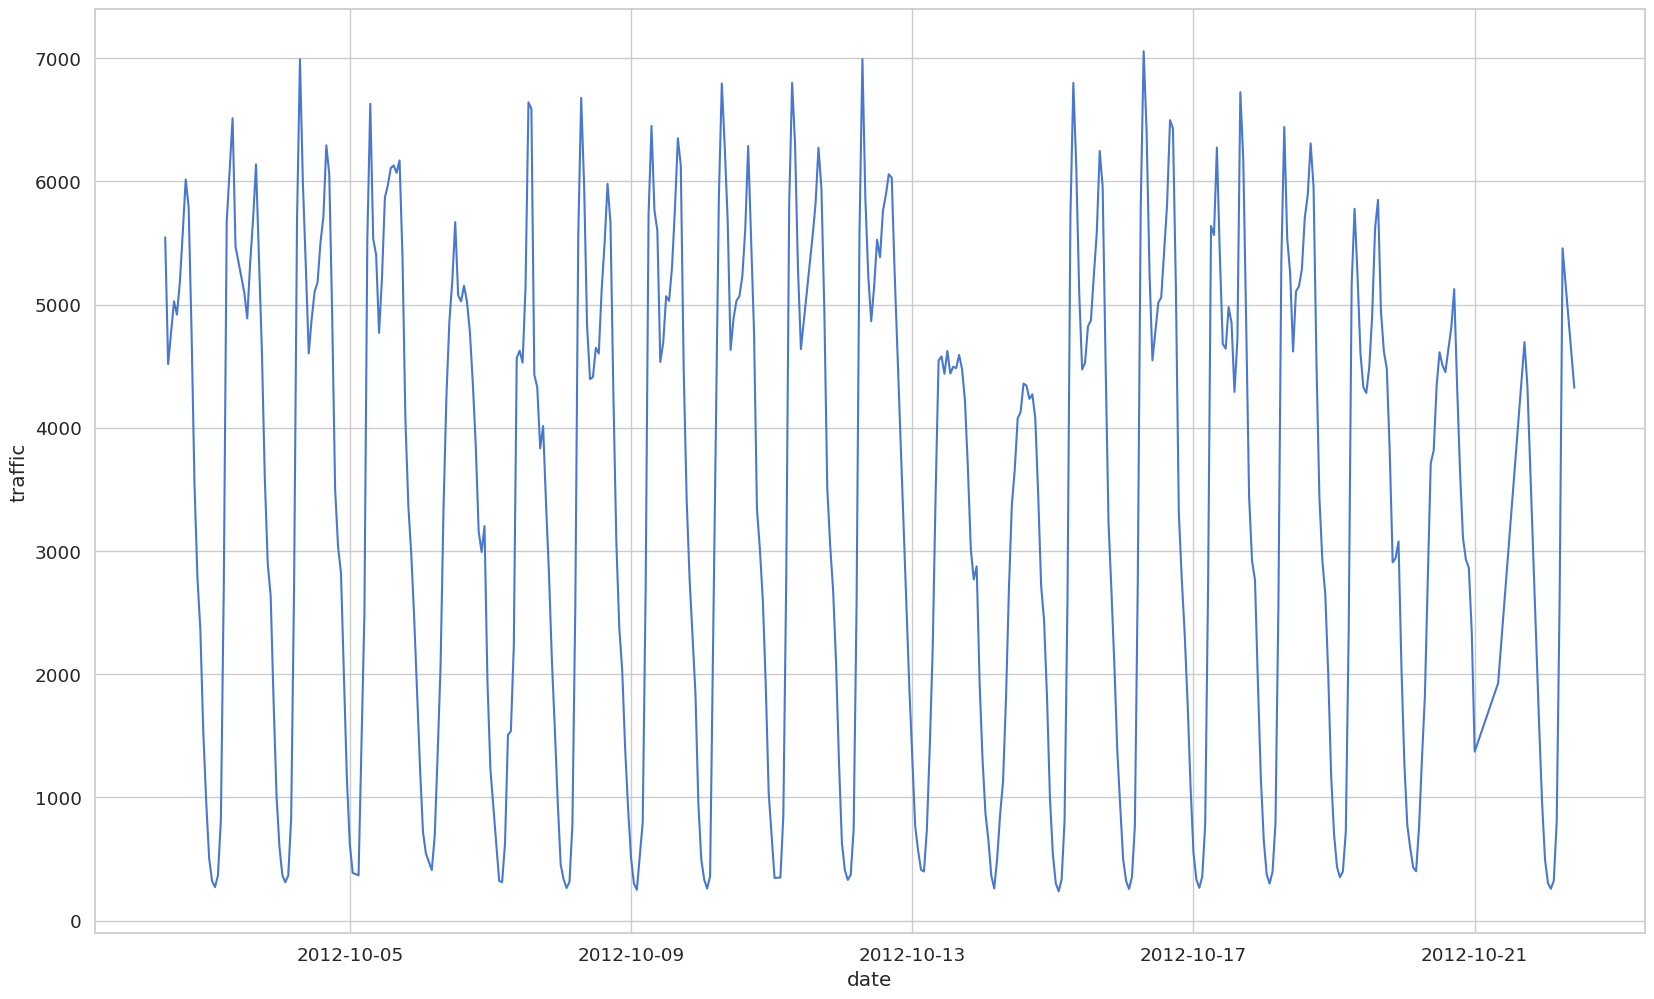

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,12
sns.set(style='whitegrid', palette='muted', font_scale=1.2)



plt.plot(df['date_time'][0:500],df['traffic_volume'][0:500])
plt.xlabel('date')
plt.ylabel('traffic')
plt.show()

In [ ]:
#연휴 변수 빈도 그래프

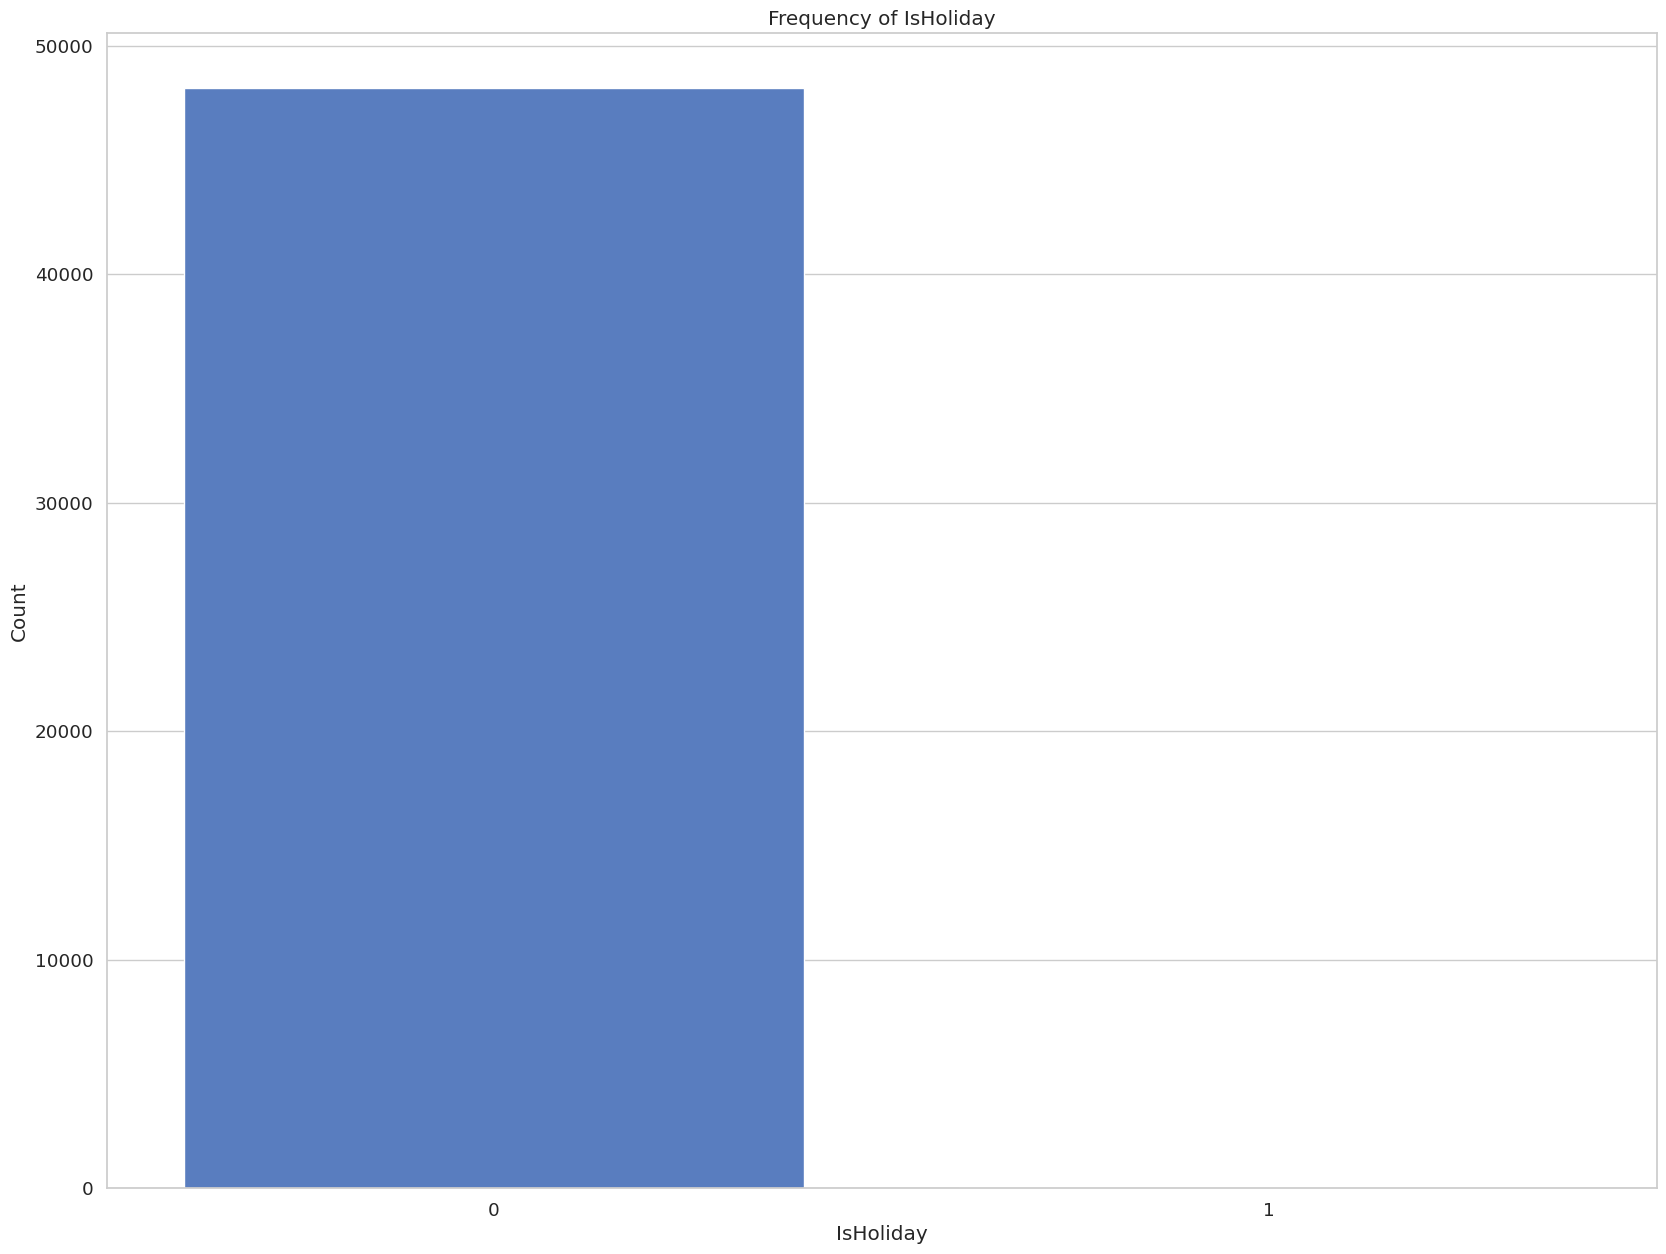

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['holiday'].value_counts()

# 그래프 설정
plt.figure(figsize=(20, 15))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Frequency of IsHoliday')
plt.show()

#변수별 그래프 보여줄때 참고하기

---




#전처리 코드 - EDA 끝나고 여기부터 실행

*   여기서부터 전처리된 데이터로 사용하면 된다.
*   스케일링과 traintest셋 분할 하는 과정








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import deque

In [ ]:
traffic_df=pd.read_csv('/content/drive/MyDrive/traffic_volume_preprocessed_2.csv') #전처리된 데이터 불러오기

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52551 entries, 0 to 52550
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       52551 non-null  object 
 1   holiday         52551 non-null  float64
 2   temp            52551 non-null  float64
 3   rain_1h         52551 non-null  float64
 4   snow_1h         52551 non-null  float64
 5   clouds_all      52551 non-null  float64
 6   weather_main    52551 non-null  float64
 7   traffic_volume  52551 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.2+ MB


In [ ]:
#train_test분리
def data_split(df):
    n = len(df)
    train_df = df[0:int(n*0.8)]#8할이 train
    test_df = df[int(n*0.8):] #2할이 test
    c = df.shape[1]
    return train_df, test_df, c

In [ ]:
def x_window_re(x, size):
    a = []  # 빈 리스트 생성
    for i in range(len(x) - size + 1):
        a.append(x[i:i + size])

    return np.array(a)  # 리스트-> df

def y_window_re(x, size):
    a = []  # 빈 리스트 생성
    for i in range(len(x) - size + 1):
        a.append(x[i:i + size])

    return np.array(a)



In [ ]:
y =traffic_df[['traffic_volume','date_time']]
y.set_index('date_time', inplace=True)

##training에 모든 변수 데이터 사용한 코드
#traffic_df=traffic_df.drop(columns='traffic_volume')
#traffic_df=traffic_df[['traffic_volume','date_time']]
traffic_df.set_index('date_time', inplace=True)

In [ ]:
print(traffic_df)

                     holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2012-10-02 09:00:00      0.0 -258.02      0.0      0.0        40.0   
2012-10-02 10:00:00      0.0 -256.94      0.0      0.0        75.0   
2012-10-02 11:00:00      0.0 -256.72      0.0      0.0        90.0   
2012-10-02 12:00:00      0.0 -256.17      0.0      0.0        90.0   
2012-10-02 13:00:00      0.0 -255.16      0.0      0.0        75.0   
...                      ...     ...      ...      ...         ...   
2018-09-30 19:00:00      0.0 -262.85      0.0      0.0        75.0   
2018-09-30 20:00:00      0.0 -263.54      0.0      0.0        90.0   
2018-09-30 21:00:00      0.0 -263.57      0.0      0.0        90.0   
2018-09-30 22:00:00      0.0 -264.21      0.0      0.0        90.0   
2018-09-30 23:00:00      0.0 -264.18      0.0      0.0        90.0   

                     weather_main  traffic_volume  
date_time                            

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler() #스케일링

traffic_df= pd.DataFrame(scaler.fit_transform(traffic_df))
y= pd.DataFrame(scaler.fit_transform(y))


x_train, x_test, x_nf=data_split(traffic_df)   #train test set split
y_train, y_test, y_nf=data_split(y)


In [ ]:
print(traffic_df.shape)
print(x_train.shape)

(52551, 7)
(42040, 7)


#슬라이딩 윈도우

In [ ]:
#슬라이딩 윈도우
WINDOW_SIZE=24 # 24시간 기준
x_train_window = x_window_re(x_train, WINDOW_SIZE)
y_train_window = y_window_re(y_train, WINDOW_SIZE)

x_test_window = x_window_re(x_test, WINDOW_SIZE)
y_test_window = y_window_re(y_test, WINDOW_SIZE)

In [ ]:
x_train_window.shape

(42017, 24, 7)

In [ ]:
y_train_window.shape

(42017, 24, 1)

#여기서부터 실행코드


In [ ]:
# 하이퍼 파라미터
LEARNING_RATE = 0.01
BATCH_SIZE = 256
EPOCHS = 10
PCA_COMPONENT = 4
WINDOW_SIZE=24
TRAINDATA = '교통량_train_windowsize_24.npz'
TESTDATA = '교통량_test_windowsize_24.npz'
window_size =WINDOW_SIZE
import numpy as np




#LSTM

In [ ]:
print(x_train_window.shape)
print(y_train_window.shape)
print(x_test_window.shape)
print(y_test_window.shape)

(42017, 24, 7)
(42017, 24, 1)
(10488, 24, 7)
(10488, 24, 1)


#최종(earlystopping 추가)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 10)            720       
                                                                 
 dropout (Dropout)           (None, 24, 10)            0         
                                                                 
 dense (Dense)               (None, 24, 1)             11        
                                                                 
Total params: 731 (2.86 KB)
Trainable params: 731 (2.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1314/1314 [==============================] - 20s 14ms/step - loss: 0.2566 - mae: 0.2746 - val_loss: 0.0138 - val_mae: 0.0782
Epoch 2/200
1314/1314 [==============================] - 16s 12ms/step - loss: 0.0378 - mae: 0.1399 - val_loss: 0.0033 - val_mae: 0.0402
Epoch 3/200
1314

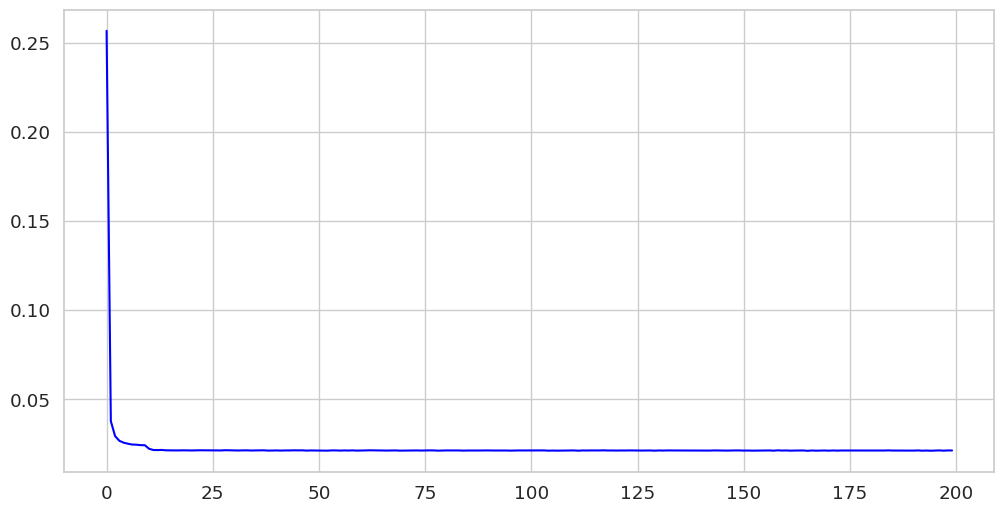

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error



model = keras.Sequential()
model.add(keras.layers.LSTM(10, activation='relu', return_sequences=True, input_shape=(24, x_nf)))
model.add(keras.layers.Dropout(0.1))
# Dense 레이어 수정
model.add(keras.layers.Dense(1, activation='linear'))  # 'linear' 활성화 함수 사용
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

history=model.fit(x_train_window, y_train_window, validation_data=(x_test_window,y_test_window), epochs=200)

# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))  # 열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)

#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)

loss_history1 = history.history['loss']

plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='', color='blue')
plt.show()


In [ ]:
y_pred1

array([[[-1.3104432 ],
        [-1.3784175 ],
        [-1.3637586 ],
        ...,
        [-0.3725227 ],
        [-0.78694075],
        [-1.1124476 ]],

       [[-1.3767008 ],
        [-1.3656118 ],
        [-1.0908041 ],
        ...,
        [-0.78694075],
        [-1.1124476 ],
        [-1.2736194 ]],

       [[-1.3629587 ],
        [-1.0923555 ],
        [-0.02859553],
        ...,
        [-1.1124476 ],
        [-1.2736194 ],
        [-1.390247  ]],

       ...,

       [[-0.23312767],
        [ 0.40387052],
        [-0.63742894],
        ...,
        [ 0.24448754],
        [-0.15128839],
        [-0.46146274]],

       [[ 0.40299618],
        [-0.6381256 ],
        [-1.0938334 ],
        ...,
        [-0.15128839],
        [-0.46146274],
        [-0.8265668 ]],

       [[-0.6300702 ],
        [-1.0937761 ],
        [-1.205791  ],
        ...,
        [-0.46146274],
        [-0.8265668 ],
        [-1.076013  ]]], dtype=float32)

In [ ]:
 y_test_window.shape

(10488, 24, 1)

In [ ]:
y_test_window[:,1]

array([[-1.40997735],
       [-1.39749441],
       [-1.11402768],
       ...,
       [ 0.40785056],
       [-0.64799798],
       [-1.11922891]])

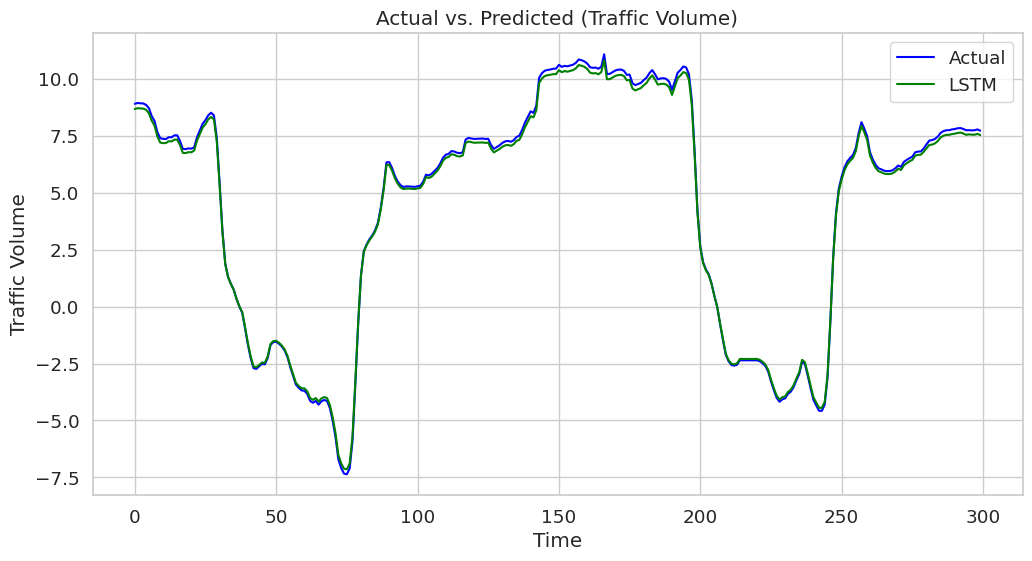

In [ ]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)

import numpy as np

actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# 하나의 시간 창 선택 (예: 0번째 시간 창)
time_window_index = 1

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1[:, 0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='LSTM', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(y_pred1.shape)
print(y_test_window.shape)
print(x_train_window.shape)

(23961, 24, 1)
(23961, 24, 1)
(23961, 24, 7)


#GRU

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 10)            570       
                                                                 
 dropout_1 (Dropout)         (None, 24, 10)            0         
                                                                 
 dense_1 (Dense)             (None, 24, 1)             11        
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1314/1314 [==============================] - 26s 19ms/step - loss: 0.1930 - mae: 0.2665 - val_loss: 0.0101 - val_mae: 0.0691
Epoch 2/200
1314/1314 [==============================] - 22s 17ms/step - loss: 0.0359 - mae: 0.1320 - val_loss: 0.0025 - val_mae: 0.0367
Epoch 3/200
13

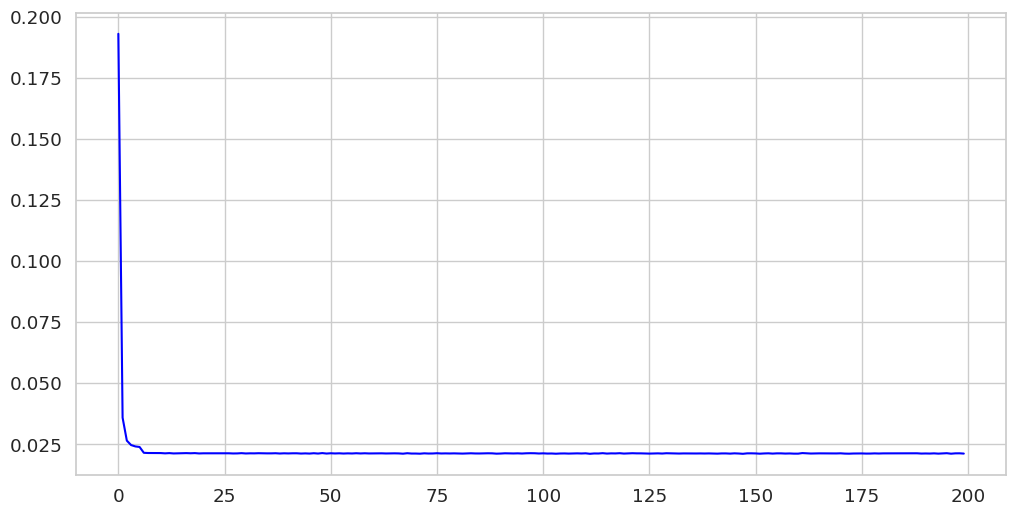

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model = keras.Sequential()
model = keras.Sequential()
model.add(keras.layers.GRU(10, activation='relu',  return_sequences=True,input_shape=(24, x_nf)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='linear'))  # 'linear' 활성화 함수 사용
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])  # MSE 손실 함수 사용

history=model.fit(x_train_window, y_train_window, validation_data=(x_test_window,y_test_window), epochs=200)

# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))#열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)
loss_history1 = history.history['loss']
#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)


plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='',color='blue')

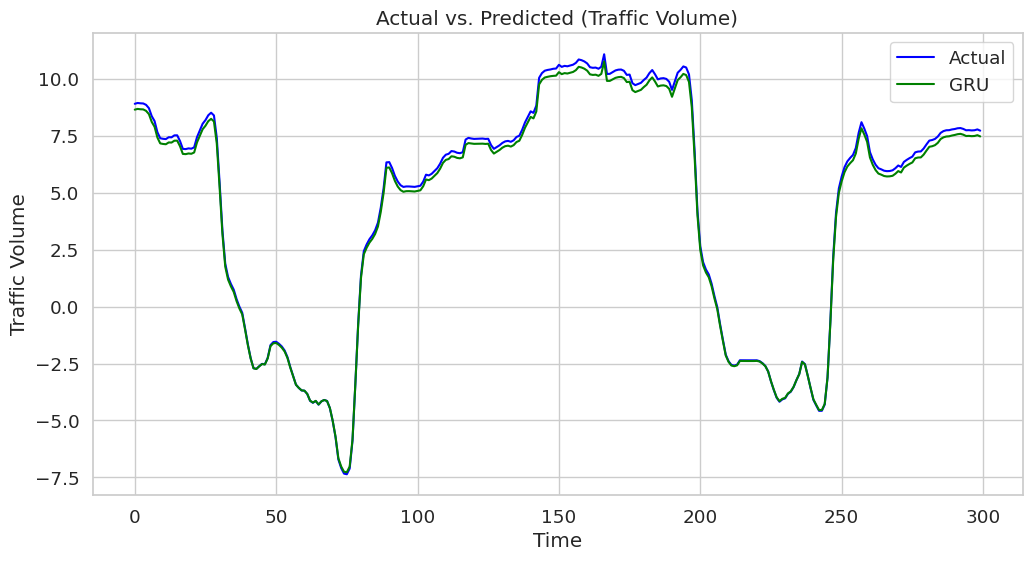

In [ ]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)
import numpy as np

actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# 하나의 시간 창 선택 (예: 0번째 시간 창)
time_window_index = 1

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1[:, 0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='GRU', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


#cnn-lstm

In [ ]:
!pip install  tensorflow_addons

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            704       
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 32)            0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 11, 32)            8320      
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


 dense_2 (Dense)             (None, 24)                8472      
                                                                 
Total params: 17496 (68.34 KB)
Trainable params: 17496 (68.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1314/1314 [==============================] - 28s 20ms/step - loss: 0.0601 - mae: 0.1334 - val_loss: 0.0084 - val_mae: 0.0677
Epoch 2/200
1314/1314 [==============================] - 22s 17ms/step - loss: 0.0056 - mae: 0.0501 - val_loss: 0.0040 - val_mae: 0.0466
Epoch 3/200
1314/1314 [==============================] - 11s 8ms/step - loss: 0.0029 - mae: 0.0361 - val_loss: 0.0022 - val_mae: 0.0351
Epoch 4/200
1314/1314 [==============================] - 13s 10ms/step - loss: 0.0019 - mae: 0.0287 - val_loss: 0.0020 - val_mae: 0.0343
Epoch 5/200
1314/1314 [==============================] - 12s 9ms/step - loss: 0.0013 - mae: 0.0235 - val_loss: 0.0013 - val_mae: 0.0282
Epoch 6/200
1314/

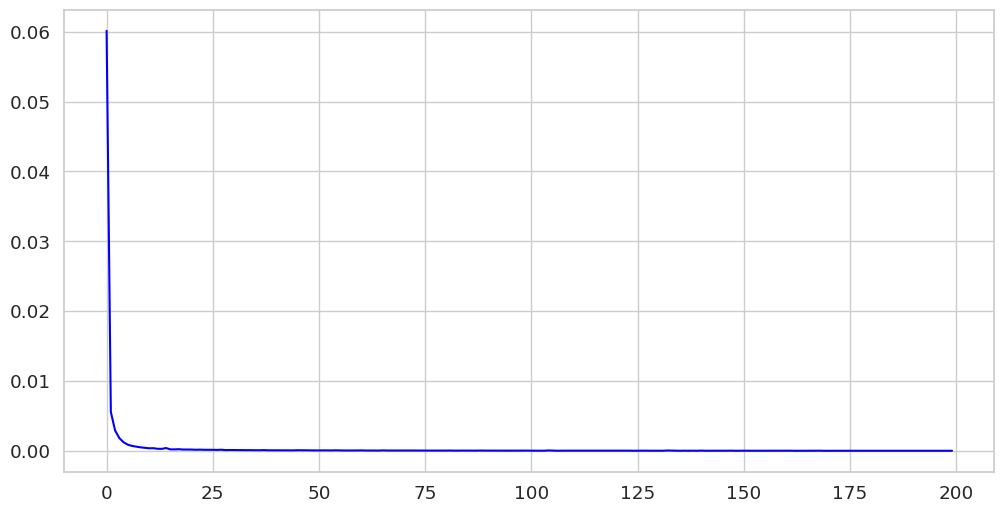

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, concatenate, Embedding, Flatten, GRU
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
import tensorflow_addons as tfa


model = keras.Sequential()
model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=(24, x_nf)))
model.add(MaxPooling1D(2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(24, activation='linear'))  # Output shape set to 1

model.summary()

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mae')

history = model.fit(x_train_window, y_train_window, validation_data=(x_test_window, y_test_window), epochs=200)

# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))  # 열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)

#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)

loss_history1 = history.history['loss']

plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='', color='blue')
plt.show()


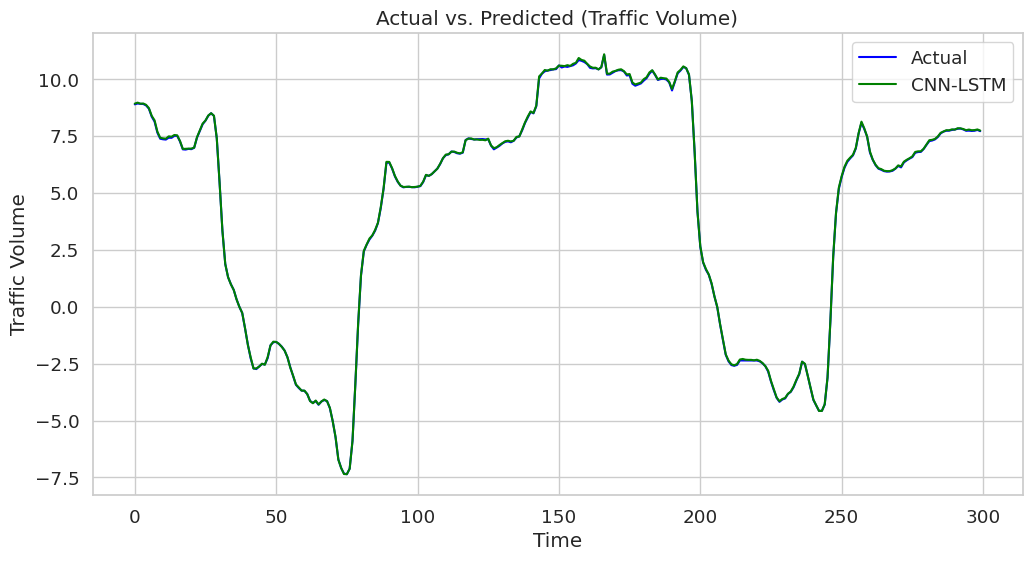

In [ ]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)
actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='CNN-LSTM', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()
